# Import 

In [2]:
# Cleaning
import pandas as pd
import numpy as np
from scipy.stats import mode


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import iqr
from scipy.stats import scoreatpercentile as pct
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Functions

In [3]:
# Returns distribution plots for numerical data
def distrib_plots(num_df):
    plt.figure(figsize = (16,12))
    for i, col in enumerate(num_df.columns, 1):
        plt.subplot(3,4,i)
        sns.histplot(num_df[col], bins=20)

In [4]:
# Import data
housing_df = pd.read_csv('data/regression_data.csv')
housing_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
# Drop id
housing_df.drop(['id'], axis=1, inplace=True)

In [24]:
# Drop duplicates
housing_df.drop_duplicates(inplace=True)
housing_df = housing_df.reset_index(drop=True)

# Numericals and categoricals

In [6]:
# Change respective columns to categorical
for col in ["view", "waterfront", "condition", "grade", "lat", "long", "zipcode"]:
    housing_df[col] = housing_df[col].astype('category')

In [7]:
# Get numerical data
numerical_df = housing_df._get_numeric_data()
numerical_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,221900
1,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639,538000
2,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,180000
3,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,604000
4,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,510000


# Distribution

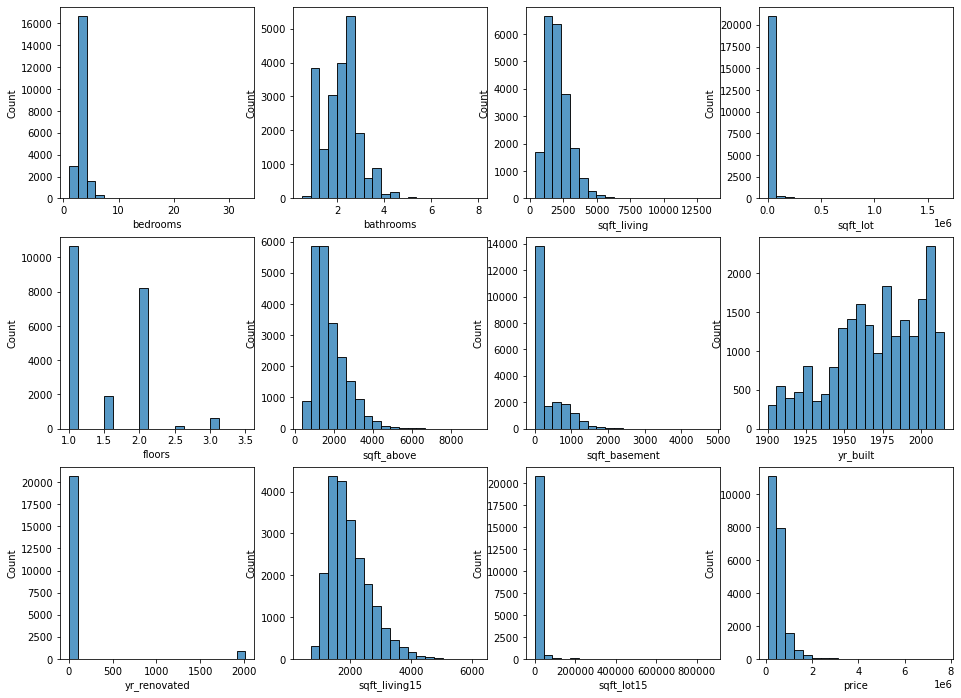

In [8]:
# Showing the distibution of numerical features
distrib_plots(numerical_df)

# Correlation

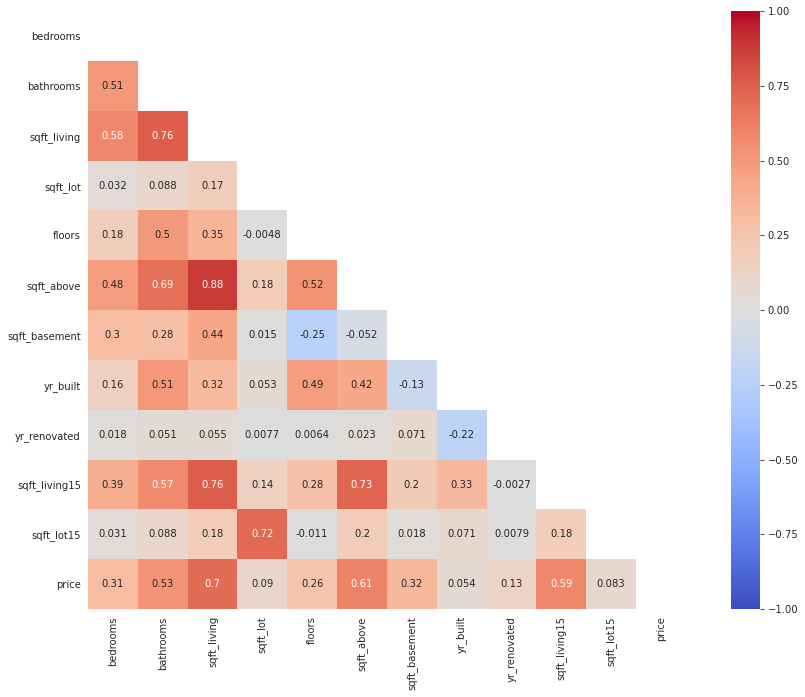

In [19]:
corr = housing_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 11))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [21]:
# Check for highly correlated features
corr_matrix=housing_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.70)]

['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']

# Plots